## What is a Computer Vision
1. Object detection
2. Segmentation
3. Generating images

Computer vision is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog (binary classification).

Or whether a photo is of a cat, dog or chicken (multi-class classification).

Or identifying where a car appears in a video frame (object detection).

Or figuring out where different objects in an image can be separated (panoptic segmentation).

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


In [2]:
## Printing the version of torch vision and PyTorch
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.3.0+cu121
torchvision version: 0.18.0+cu121


## 1. Getting a dataset

Datasets can be downloaded from `torchvision.datasets`

- root(string) : Root directory of the database.(where the dataset exists)
- train(bool,optional) : Wheather we want training version of the dataset or the testing version
- download(bool, optional) : Do we want to download it
- transform(callable,optional) : A function that takes in the PIL Image and returns a transformed version
- target_transform(callable, optional) : a function that takes in the target and transforms it


Transform (`ToTensor`) : converts PIL Image (H x W X C) to a torch.FloatTensor(C x H x W) in the range [0.0, 1.0]

In [3]:
## setup training data

train_data = datasets.FashionMNIST(
    root = "data", # where to download to ?
    train = True, # do we want the training dataset ?
    download = True, # do we want to download ?
    transform = ToTensor(), # how to we want to transform the data ?
    target_transform = None # how do we want to transform the labels/target ?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:10<00:00, 2611019.70it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209812.23it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 955775.86it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 25283696.71it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
## See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

`train_data.classes` gives the list of all the classes present in the dataset

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
# converting classes to index
# this is done so the output number can directly identify what item it is
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
image.shape

torch.Size([1, 28, 28])

Image Shape : torch.Size([1, 28, 28])


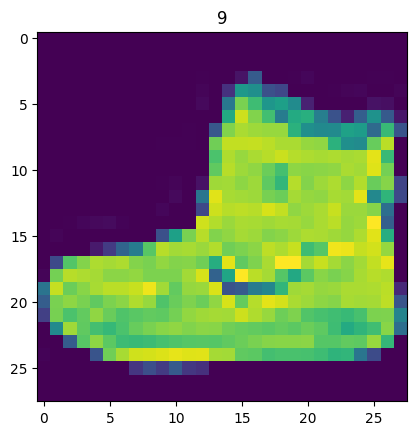

In [9]:
## 1.1 Visualizing our data
## the shape of the input figure doesnot match the shape (NCHW)
image, label = train_data[0]
print(f"Image Shape : {image.shape}")
plt.imshow(image.squeeze()) # squeeze - removes extra dimension
plt.title(label);


(-0.5, 27.5, 27.5, -0.5)

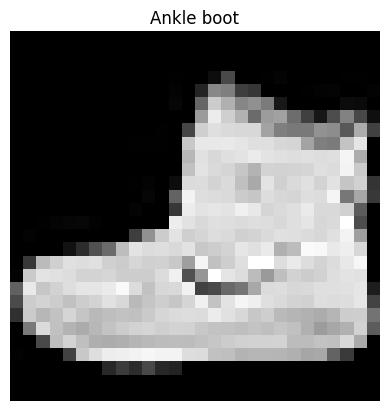

In [10]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label]);
plt.axis(False)

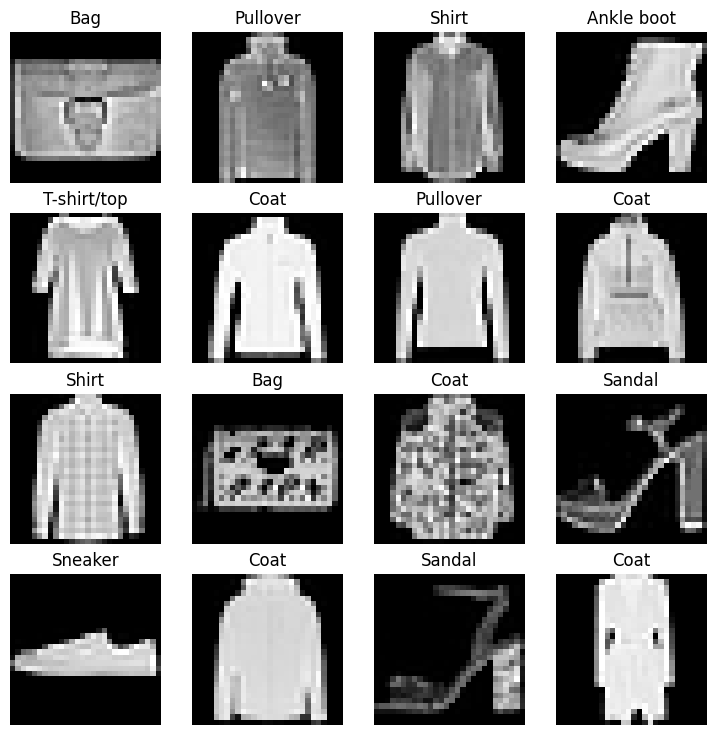

In [11]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (9 , 9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(1, len(train_data), size = [1]).item() # to generate random images and size = [1] indicates that only one image should be displayed
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Now we've got a dataset ready to go.

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

The `DataLoader` does what you think it might do.

It helps load data into a model.

For training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter. (batch_size of 32)

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once.

But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

![an example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)


In [12]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data, batch_size = 32, shuffle = True)  # shuffle means all the samples are mixed up. For training it is good to shuffle data
test_dataloader = DataLoader(dataset = test_data, batch_size = 32, shuffle = False) # in test data, for evaluation process, it is good to keep the shuffle of because our model has never seen the test dataset
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78c60d29f550>,
 <torch.utils.data.dataloader.DataLoader at 0x78c60d29f730>)

In [13]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of 32")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of 32")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x78c60d29f550>, <torch.utils.data.dataloader.DataLoader object at 0x78c60d29f730>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [14]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


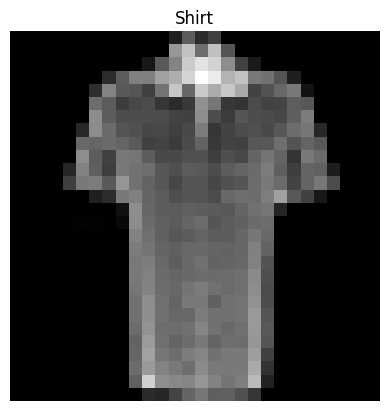

In [15]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size =[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Above Code Explaination
This code snippet is written in Python and uses the PyTorch library to randomly select an item from a batch of training data. Here's a step-by-step explanation of what it does:

1. **random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()**:
   - `torch.randint(0, len(train_features_batch), size=[1])`: This function generates a single random integer between 0 (inclusive) and the length of `train_features_batch` (exclusive). The `size=[1]` argument specifies that it returns a tensor with one element.
   - `.item()`: This method converts the single-element tensor to a Python scalar (an integer in this case).

2. **img, label = train_features_batch[random_idx], train_labels_batch[random_idx]**:
   - `train_features_batch[random_idx]`: This retrieves the feature (image) at the index `random_idx` from `train_features_batch`.
   - `train_labels_batch[random_idx]`: This retrieves the label corresponding to the same index `random_idx` from `train_labels_batch`.
   - The selected feature and label are then assigned to the variables `img` and `label`, respectively.

In summary, this code randomly selects one image and its corresponding label from the batch of training features and labels.

## 3. Model 0: Build a baseline model
When starting to build a series of machine learning modelling experiments, its best practice is to create a baseline model.

A baseline model is a simple model you will try to improve upon with subsequent models/experiments

In [16]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a simple sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # performs forward pass

# printing out whats happening
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]") # this means that one value per pixel


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [17]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape = 784, # i.e 28*28 = 784
    hidden_units = 10,
    output_shape = len(class_names) # this will one for every class
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")  # paste the raw file link
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [22]:
# importing accuracy function
from helper_functions import accuracy_fn

## 3.1 Creating a loss funtion and an optimizer

- Loss Function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
- Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)

In [23]:
# 3.1 creating a loss function and an optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

### 3.2 Creating a function to time our experiments

Loss function and optimizer ready

It's time to start training a model.

let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the [`timeit.default_timer()` function](https://docs.python.org/3/library/timeit.html#timeit.default_timer) from the Python [`timeit` module](https://docs.python.org/3/library/timeit.html).

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

## 3.3 Creating a training loop and training a model on batches of data
1. Loop through epochs
2. Loop through batches, perform training steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, calculate the test loss per batch
4. Print out
5. Time it all

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch (calculating test prediction values with y test)

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 26.058 seconds


In [26]:
device = "cuda" if(torch.cuda.is_available()) else "cpu"
device

'cuda'

In [27]:
 # 4. Make predictions
 torch.manual_seed(42)
 def eval_model(model : torch.nn.Module, data_loader : torch.utils.data.DataLoader, loss_fn : torch.nn.Module, accuracy_fn, device = device):
  """Returns a dictionary containing the result of model predicting on data_loader."""
  loss, acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)

      # Accumulate the loss and the acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    # Scale the loss and accuracy to calculate the averge loss and accuracy
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc
          }

In [28]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model= model_0, data_loader = train_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4302612841129303,
 'model_acc': 84.94166666666666}

In [29]:
torch.cuda.is_available()

True

In [30]:
device = "cuda" if(torch.cuda.is_available()) else "cpu"
device

'cuda'

## 6. Model 1 : Building a better model with non-linearity

linear means straight and non-linear means non-straight.

Let's find out.

We'll do so by recreating a similar model to before, except this time we'll put non-linear functions (`nn.ReLU()`) in between each linear layer.

In [31]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shapes:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shapes, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)


In [32]:
device

'cuda'

In [33]:
# Create an instance of model 1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shapes = 784, hidden_units = 10, output_shape = len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [34]:
# 6.1 Creating a Loss FUnction and an optimizer (evaluation matrix)
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

# 6.1 functionizing training and evaluation/testing loops

Let's create a function for
- training loop - `train_step()`
- testing loop - `test_step()`

In [35]:
def train_step(model : torch.nn.Module, data_loader : torch.utils.data.DataLoader, loss_fn : torch.nn.Module, optimizer : torch.optim.Optimizer, accuracy_fn, device : torch.device = device):

  ### Training
  train_loss, train_acc = 0, 0
  # Add a loop to loop through training batches

  model.train()
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # outputs the raw logits from the model

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1)) # Go from logits -> pred

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss : {train_loss:.5f} | Train Accuracy : {train_acc:.2f}%")

In [36]:
def test_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn, device: torch.device = device):
  ### Testing
  # Setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
      for X, y in (data_loader):
        # Put data into target devices
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        test_pred = model(X)

        # 2. Calculate loss (accumatively) & accuracy
        test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch (calculating test prediction values with y test)
        test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1)) # Go from logits -> pred

      # Calculations on test metrics need to happen inside torch.inference_mode()
      # Divide total test loss by length of test dataloader (per batch)
      test_loss /= len(data_loader)

      # Divide total accuracy by length of test dataloader (per batch)
      test_acc /= len(data_loader)

  ## Print out what's happening
  print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [37]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Train and test model
epochs = 3

# Create an optimization and evaluation loop using train_step() and test_steo()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model = model_1, data_loader = train_dataloader, loss_fn = loss_fn, optimizer = optimizer, accuracy_fn = accuracy_fn, device = device)
  test_step(model = model_1, data_loader = test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu, end = train_time_end_on_gpu, device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss : 1.09199 | Train Accuracy : 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss : 0.78101 | Train Accuracy : 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss : 0.67027 | Train Accuracy : 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 30.268 seconds


In [38]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4302612841129303,
 'model_acc': 84.94166666666666}

Our model trained but the training time took longer?

> **Note:** The training time on CUDA vs CPU will depend largely on the quality of the CPU/GPU you're using. Read on for a more explained answer.

> **Question:** "I used a a GPU but my model didn't train faster, why might that be?"
>
> **Answer:** Well, one reason could be because your dataset and model are both so small (like the dataset and model we're working with) the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.
>
> There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.
>
> So for smaller models and datasets, the CPU might actually be the optimal place to compute on.
>
> But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.
>
> However, this is largely dependant on the hardware you're using. With practice, you will get used to where the best place to train your models is.

Let's evaluate our trained `model_1` using our `eval_model()` function and see how it went.

In [39]:
 torch.manual_seed(42)
 def eval_model(model : torch.nn.Module, data_loader : torch.utils.data.DataLoader, loss_fn : torch.nn.Module, accuracy_fn, device = device):
  """Returns a dictionary containing the result of model predicting on data_loader."""
  loss, acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      # Accumulate the loss and the acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))

    # Scale the loss and accuracy to calculate the averge loss and accuracy
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc
          }

In [40]:
# Get model 1 results dictionary
model_1_results = eval_model(model = model_1, data_loader = test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

# 7. Model 2 : Building a Convolutional Neural Network

CNN's are known for their capabilities to find patterns in visual data.

In [41]:
# Create a convolutional Neural Network
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shapes: int, hidden_units: int, output_shapes: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shapes, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size =2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = output_shapes, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.Classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, out_features = output_shapes),
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = torch.flatten(x, start_dim = 1)
    # print(x.shape)
    x = self.Classifier(x)
    return x

![each layer of a neural network compresses the original input data into a smaller representation that is (hopefully) capable of making predictions on future input data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

Values that we can set ourselves in our NN's are called as Hyperparameter

- Stide = A stride of 1 is common when the model needs to maintain a high resolution of features, which is particularly important in the initial layers of the network. A stride of 2 or more may be used in deeper layers or when the input images are large, and the model needs to reduce dimensionality to control the number of parameters and computational cost.

- Padding = Padding means adding extra pixels around the input before doing operations. This keeps the spatial info intact and prevents data loss at the edges. It also helps to keep the output size consistent with the input and makes training more stable. Padding is important for maintaining spatial integrity in CNNs.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)


In [42]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shapes=1,
    hidden_units=10,
    output_shapes=len(class_names)).to(device)
model_2   # here the input_shapes = 1 because our image has a color channel of 1 (i.e [1,28,28]), the value will change to 3 if the image is colored

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [43]:
# Passing random data through our conv2d model
torch.manual_seed(42)

images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape : {images.shape}")
print(f"SIngle Images size : {test_image.shape}")
print(f"Test Image:\n {test_image}")

Image batch shape : torch.Size([32, 3, 64, 64])
SIngle Images size : torch.Size([3, 64, 64])
Test Image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[

In [44]:
# create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = (3,3), stride = 1, padding = 0)
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

**NOTE**

If you encounter an error like "Link"
then just `test_image.unsqueeze(0).shape`
now the output of the following will be [1, 3, 64, 64]


In [45]:
## stepping through nn.MaxPool2d()
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Test image shape after through conv layer : {test_image_through_conv.shape}")

# pass data through max pool layer
test_image_through_conv_max_pool = max_pool_layer(test_image_through_conv)
print(f"Test image shape after through conv layer and max pool layer : {test_image_through_conv_max_pool.shape}")

Test image shape after through conv layer : torch.Size([10, 62, 62])
Test image shape after through conv layer and max pool layer : torch.Size([10, 31, 31])


In [46]:
# set a loss function and on optimizer for model 2
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

In [47]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model= model_2, data_loader = train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
    test_step(model = model_2, data_loader = test_dataloader,loss_fn = loss_fn, accuracy_fn = accuracy_fn, device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss : 0.59446 | Train Accuracy : 78.39%
Test loss: 0.40256 | Test acc: 85.73%

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss : 0.36454 | Train Accuracy : 86.86%
Test loss: 0.35091 | Test acc: 86.87%

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss : 0.32565 | Train Accuracy : 88.14%
Test loss: 0.32510 | Test acc: 88.01%

Train time on cuda: 36.476 seconds


In [48]:
 model_2_results = eval_model(model = model_2, data_loader = test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device)
 model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32509666681289673,
 'model_acc': 88.00918530351437}

## 8. Comparing model results and training time


In [49]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.430261,84.941667
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.325097,88.009185


In [50]:
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results


,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.430261,84.941667,26.058435
1,FashionMNISTModelV1,0.685001,75.019968,30.268114
2,FashionMNISTModelV2,0.325097,88.009185,36.476093


Text(0, 0.5, 'model')

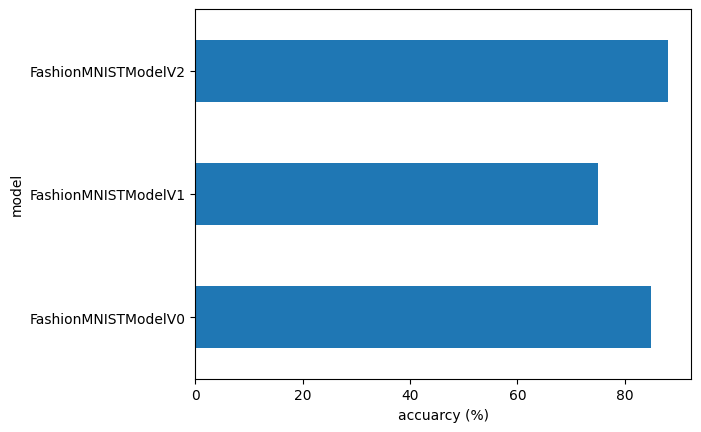

In [51]:
# visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuarcy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predcitions with best model

In [52]:
def make_predictions(model: torch.nn.Module, data : list, device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward Pass
      pred_logit = model(sample)

      # get predictions
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      # get pred_preb of the gpu for further calculations
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [53]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)


Text(0.5, 1.0, 'Sandal')

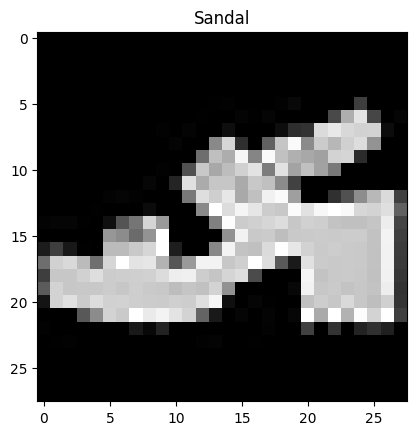

In [54]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [55]:
# Making Predictions
pred_probs = make_predictions(model = model_2, data = test_samples)
pred_probs[:2]

tensor([[1.5974e-07, 1.6456e-07, 2.6308e-07, 1.2178e-06, 5.1572e-08, 9.9973e-01,
         8.8351e-07, 4.2208e-05, 4.5996e-05, 1.8060e-04],
        [9.7267e-02, 5.4059e-01, 1.0650e-03, 1.7705e-01, 7.1795e-02, 3.9707e-05,
         1.1056e-01, 3.2400e-04, 1.2226e-03, 8.6492e-05]])

In [56]:
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [57]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

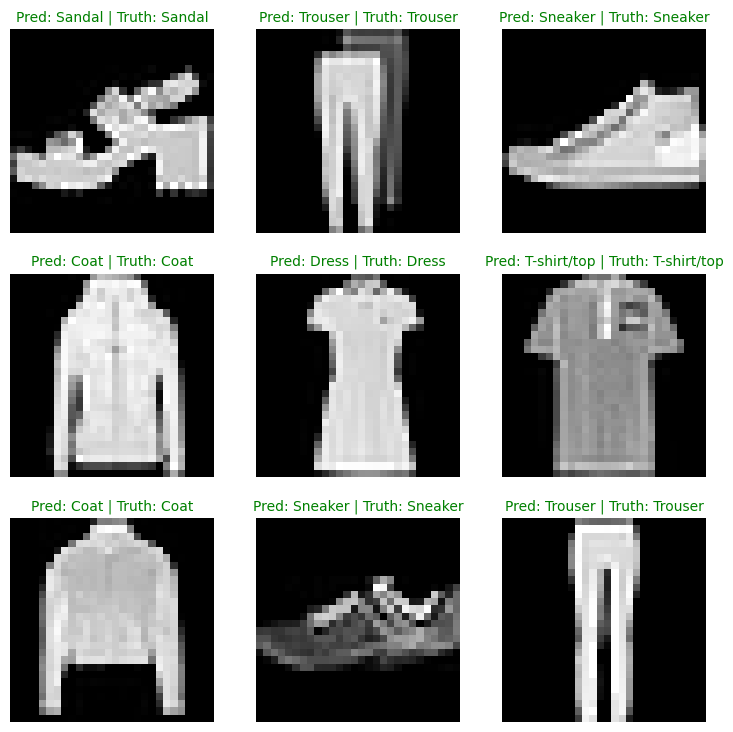

In [58]:
# Plotting predictions
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")

  # Find the prediction (in text form, eg "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = "g")
  else:
    plt.title(title_text, fontsize = 10, c = "r")
  plt.axis(False)
  # create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

## 10. Making a confusion matrix for further prediction evaluation

There are many [different evaluation metrics](https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics) we can use for classification problems.

One of the most visual is a [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

A confusion matrix shows you where your classification model got confused between predicitons and true labels.

To make a confusion matrix, we'll go through three steps:
1. Make predictions with our trained model, `model_2` (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

Let's start by making predictions with our trained model.


In [59]:
import mlxtend

In [60]:
mlxtend.__version__

'0.22.0'

In [61]:
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictions"):
    X, y = X.to(device), y.to(device)

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit.squeeze(), dim = 1).argmax(dim = 1)

    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [62]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 64.3 MB/s eta 0:00:00
mlxtend version: 0.22.0


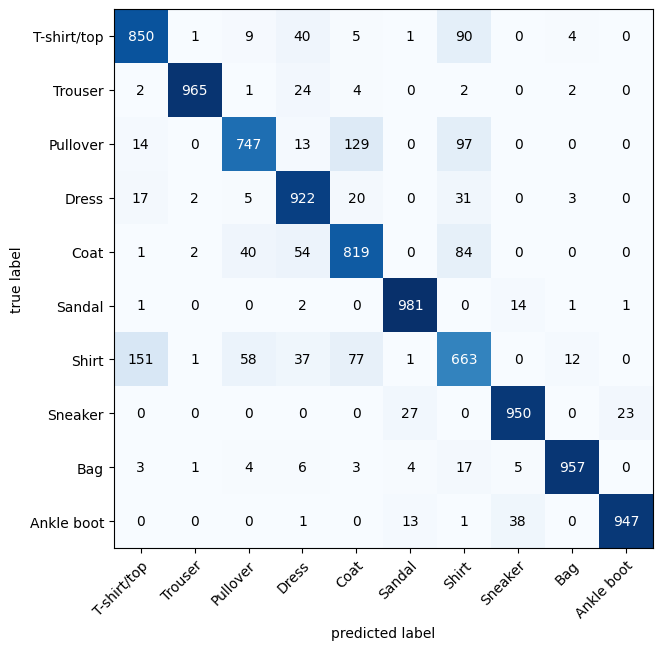

In [68]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 1. confusion matrix
confmat = ConfusionMatrix(task = "MULTICLASS", num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)

# 2. plot our confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # easier for matplotlib to work with numpy
    class_names = class_names,
    figsize = (10,7)
)

